# SP via class imbalance

Example [test scores](https://www.brookings.edu/blog/social-mobility-memos/2015/07/29/when-average-isnt-good-enough-simpsons-paradox-in-education-and-earnings/)

SImpson's paradox can also occur due to a class imbalance, where for example, over time the value of several differnt subgroups all increase, but the totla average decreases over tme.   This is also am mportant tpe to catch because this can inicate a large class disparity beased on the subgrouping variable.  

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sp_data_util import sp_plot

In [2]:
t = np.linspace(0,50,11)
count_rate = np.asarray([1,1.5,1.4])
count_pow = np.asarray([1,1.4, 1.3])
count_0 = np.asarray([100,60,40])
count = np.asarray([count_0 + count_rate*(t_i**count_pow) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*3).T
score_rate = np.asarray([.1, .112, .15])
score_0 = [310,290,280]
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores*share,axis=1)


In [3]:
total_score

array([298.        , 297.45443985, 296.68317666, 296.10797527,
       295.75884352, 295.60140953, 295.59491821, 295.70503918,
       295.90526496, 296.17565064, 296.50124668])

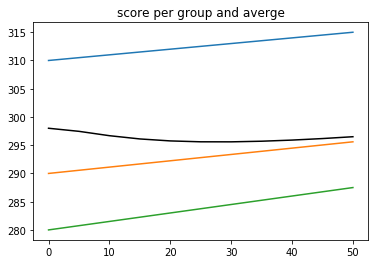

In [4]:
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

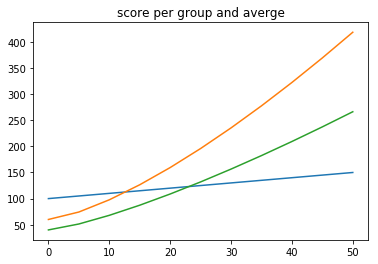

In [5]:
plt.plot(t,count)
plt.title('score per group and averge');

We can change the numbers a bit to see tht it still works. 

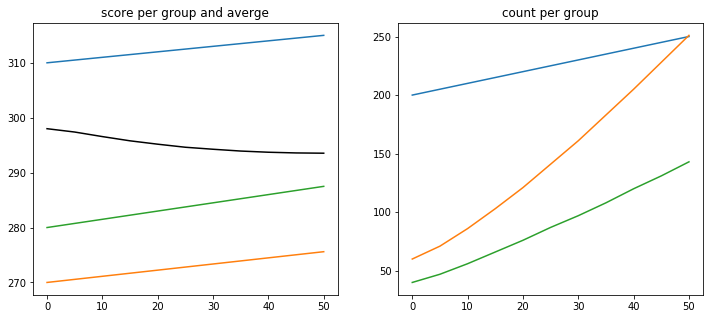

In [68]:
t = np.linspace(0,50,11)
count_rate = np.asarray([1,1.5,1.24])
count_pow = np.asarray([1,1.24, 1.13])
group_names = ['W','B','H']
count_0 = np.asarray([200,60,40])
count = np.asarray([np.floor(count_0 + count_rate*(t_i**count_pow)) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*3).T
score_rate = np.asarray([.1, .112, .15])
score_0 = [310,270,280]
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores*share,axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

plt.subplot(1,2,2)
plt.plot(t,count)
plt.title('count per group');

The above is occuring in aggregate data, we should generate and aim to detect from the individual measurements. So we can expand the above generator.  We'll use the group score and counts to draw the indivdual rows of our table. 

In [72]:
dat = [[t_t,np.random.normal(loc=sg,scale=10),g ]
            for sg_t, c_t,t_t in zip(scores_group,count,t) 
           for sg,c,g in zip(sg_t,c_t,group_names) 
           for i in range(int(c))]

In [73]:
len(dat)

5056

In [75]:
df = pd.DataFrame(data=dat,columns = ['year','score','race'])

In [76]:
df.head()

,year,score,race
0,0.0,319.747236,W
1,0.0,313.287699,W
2,0.0,319.765892,W
3,0.0,305.529096,W
4,0.0,326.985914,W


In [78]:
df.groupby(['race','year']).mean().unstack()

score                                                              \
year        0.0         5.0         10.0        15.0        20.0        25.0   
race                                                                           
B     268.125098  271.061689  272.636618  272.252614  271.537610  272.403064   
H     278.518850  282.348372  283.009075  281.799122  281.637784  285.007286   
W     310.199161  310.047206  312.085449  310.533121  312.084786  312.418217   

                                                                  
year        30.0        35.0        40.0        45.0        50.0  
race                                                              
B     274.073311  273.441639  274.016195  274.846570  275.641094  
H     284.378840  285.765549  285.440275  287.087925  285.850524  
W     313.408122  314.131684  313.920913  314.554812  314.665695

In [82]:
df.groupby(['year']).mean().T

year,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
score,297.560307,297.447154,297.821596,295.326517,294.770204,294.698819,294.660694,294.151036,293.393225,293.608386,293.057396


The overall goes down while each of the groupwise means goes up, as expected.  

In [83]:
df.groupby('race').corr()

score      year
race                          
B    score  1.000000  0.159397
     year   0.159397  1.000000
H    score  1.000000  0.183776
     year   0.183776  1.000000
W    score  1.000000  0.155091
     year   0.155091  1.000000

In [84]:
df.corr()

,year,score
year,1.000000,-0.070593
score,-0.070593,1.000000


We can see this in the correlation matrices as well, so our existing detector will work, but it has an intuitively different generating mechanism.

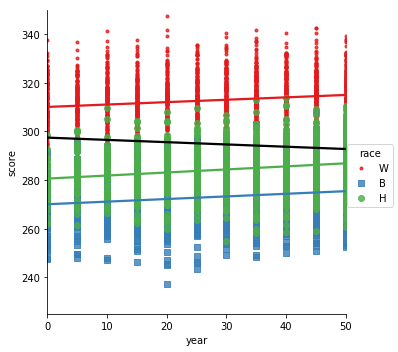

In [90]:
sp_plot(df,'year','score','race',domain_range=[0, 50, 225, 350])

Vizually, the scatter plots for this are also somewhat different, the groups are not as separable as they were in the regression-based examples we worked with initially.  